In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
from scipy.signal import butter, lfilter

In [33]:
# Define ramp signal parameters
high_level = 350e-3  # High level in volts
low_level = 222e-3   # Low level in volts
frequency = 10     # Frequency in Hz
period = 1 / frequency  # Period in seconds
dc_offset = 286e-3  # DC offset in volts
sampling_rate = 12e4  

# Create a time vector for one period
time = np.linspace(0, period, int(sampling_rate * period), endpoint=False)

# Calculate the ramp signal
ramp_up = np.linspace(dc_offset, high_level, int(len(time) * 0.5), endpoint=False)
ramp_down = np.linspace(low_level, dc_offset, int(len(time) * 0.5), endpoint=False)
ramp_signal = np.concatenate((ramp_up, ramp_down))


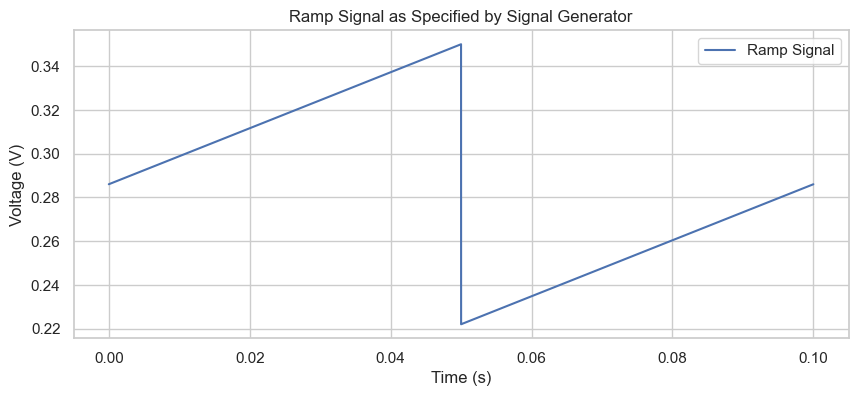

In [34]:
# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(time, ramp_signal, label='Ramp Signal')
plt.title('Ramp Signal as Specified by Signal Generator')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.legend()
plt.show()

Changing the ```mod_freq``` to interger multiple of $8 \text{kHz}$ will give us the desired $1f$ and $2f$ signals.

In [46]:
# Generate sinusoidal modulation signal
mod_freq = 16e3  # Modulation frequency in Hz
mod_amplitude = 0.020  # Amplitude of the modulation signal
modulation_signal_sin = mod_amplitude * np.sin(2 * np.pi * mod_freq * time)

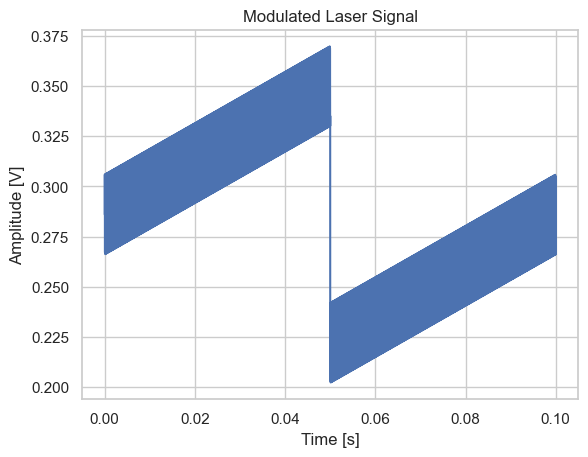

In [47]:
# Combine ramp and modulation signals
modulated_signal = ramp_signal + modulation_signal_sin

# Plot the modulated signal
plt.plot(time, modulated_signal)
plt.title('Modulated Laser Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [V]')
plt.show()


We have 12000 data points in the CSV files acquired over a period of $100 \text{ms}$

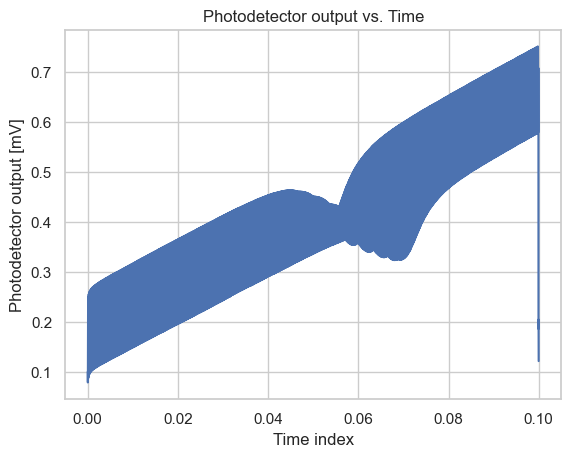

In [48]:
# Get the photodetector output data from the CSV file 
filename = "C:/Different/SRIP_2024/Photonics lab/WMS/29.160C_0.3bar_wms_1.csv"

# Read the CSV data into a DataFrame
df = pd.read_csv(filename)

# Identify the columns for the x and y-axis data 
x_data = df['Time']
photodetector_output = df['Voltage']

# Create the plot
plt.plot(x_data, photodetector_output)

plt.xlabel('Time index')
plt.ylabel('Photodetector output [mV]')
plt.title('Photodetector output vs. Time')

# Display the plot
plt.show()


In [49]:
# Lock-in amplifier parameters
reference_signal = modulation_signal_sin  # Reference signal is the modulation signal

# Multiply photodetector output with reference signal (in-phase component)
in_phase_sin = photodetector_output * reference_signal

in_phase_cos = photodetector_output * (mod_amplitude * np.cos(2 * np.pi * mod_freq * time))

Parameters for the low-pass filter

In [50]:
# Define the parameters
time_constant = 138e-6  # 138 microseconds
fc = 1 / (2 * np.pi * time_constant)  # Cutoff frequency in Hz


# Design the 4th-order Butterworth low-pass filter
order = 4
nyquist = 0.5 * sampling_rate
normal_cutoff = fc / nyquist
b, a = butter(order, normal_cutoff, btype='low', analog=False)


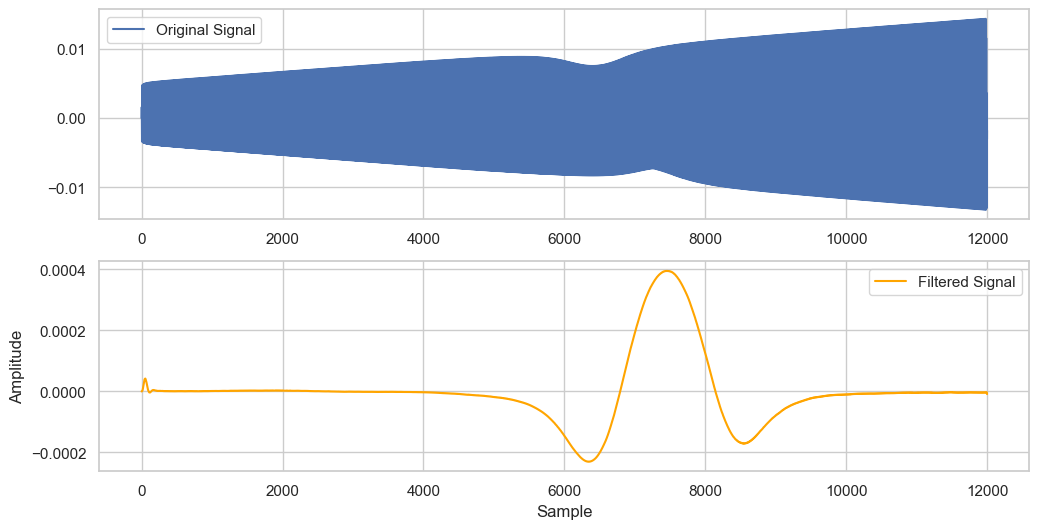

In [51]:
# Apply the filter to the signal
filtered_signal = lfilter(b, a, in_phase_sin)

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(in_phase_sin, label='Original Signal')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(filtered_signal, label='Filtered Signal', color='orange')
plt.legend()
plt.xlabel('Time index')
plt.ylabel('Amplitude')
plt.show()


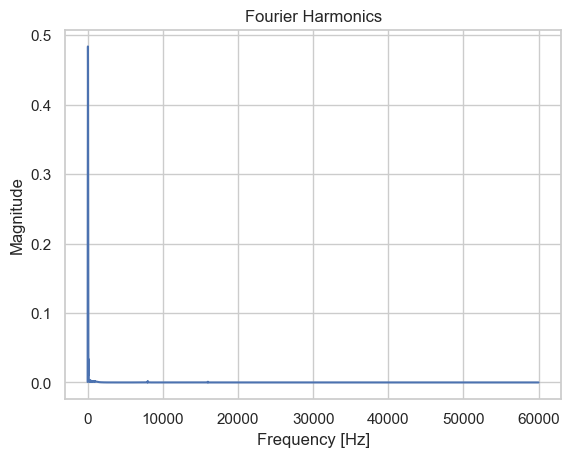

In [52]:
# Perform FFT
fft_output = np.fft.fft(filtered_signal)
fft_freqs = np.fft.fftfreq(len(time), 1/sampling_rate)

# Plot the magnitude of the FFT
plt.plot(fft_freqs[:len(fft_freqs)//2], np.abs(fft_output)[:len(fft_freqs)//2])
plt.title('Fourier Harmonics')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()

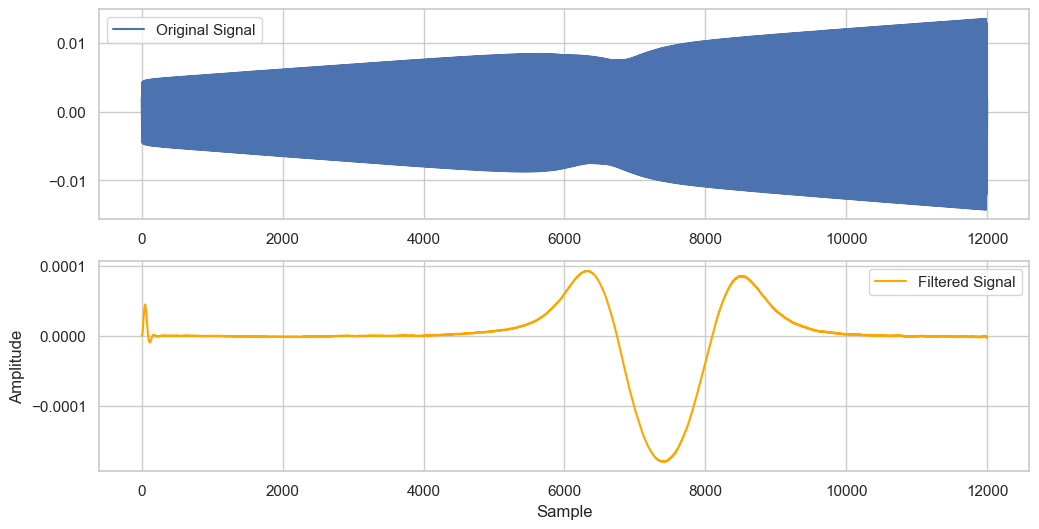

In [53]:
# Apply the filter to the signal
filtered_signal_cos = lfilter(b, a, in_phase_cos)

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(in_phase_cos, label='Original Signal')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(filtered_signal_cos, label='Filtered Signal', color='orange')
plt.legend()
plt.xlabel('Time index')
plt.ylabel('Amplitude')
plt.show()

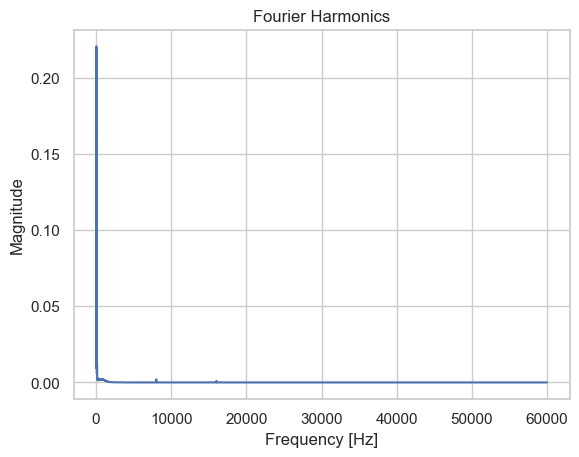

In [54]:
# Perform FFT
fft_output = np.fft.fft(filtered_signal_cos)
fft_freqs = np.fft.fftfreq(len(time), 1/sampling_rate)

# Plot the magnitude of the FFT
plt.plot(fft_freqs[:len(fft_freqs)//2], np.abs(fft_output)[:len(fft_freqs)//2])
plt.title('Fourier Harmonics')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()

In [55]:
mag = np.sqrt(filtered_signal**2 + filtered_signal_cos**2)
required_magnitude = (2*mag) / mod_amplitude

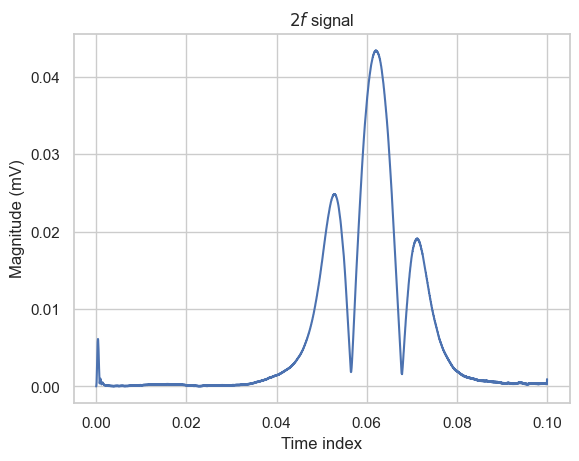

In [59]:
plt.plot(time, required_magnitude)
plt.title('$2f$ signal')
plt.xlabel('Time index')
plt.ylabel('Magnitude (mV)')
plt.show()

For $1f$ signal

In [64]:
# Generate sinusoidal modulation signal
mod_freq = 8e3  # Modulation frequency in Hz
mod_amplitude = 0.020  # Amplitude of the modulation signal
modulation_signal_sin = mod_amplitude * np.sin(2 * np.pi * mod_freq * time)

modulated_signal = ramp_signal + modulation_signal_sin

# Lock-in amplifier parameters
reference_signal = modulation_signal_sin  # Reference signal is the modulation signal

# Multiply photodetector output with reference signal (in-phase component)
in_phase_sin = photodetector_output * reference_signal

in_phase_cos = photodetector_output * (mod_amplitude * np.cos(2 * np.pi * mod_freq * time))



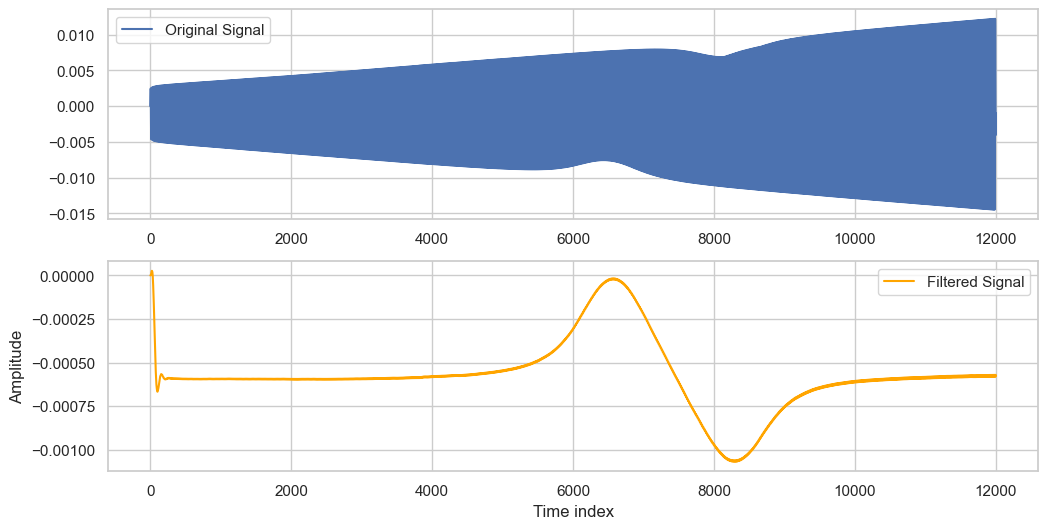

In [65]:
# Apply the filter to the signal
filtered_signal = lfilter(b, a, in_phase_sin)

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(in_phase_sin, label='Original Signal')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(filtered_signal, label='Filtered Signal', color='orange')
plt.legend()
plt.xlabel('Time index')
plt.ylabel('Amplitude')
plt.show()


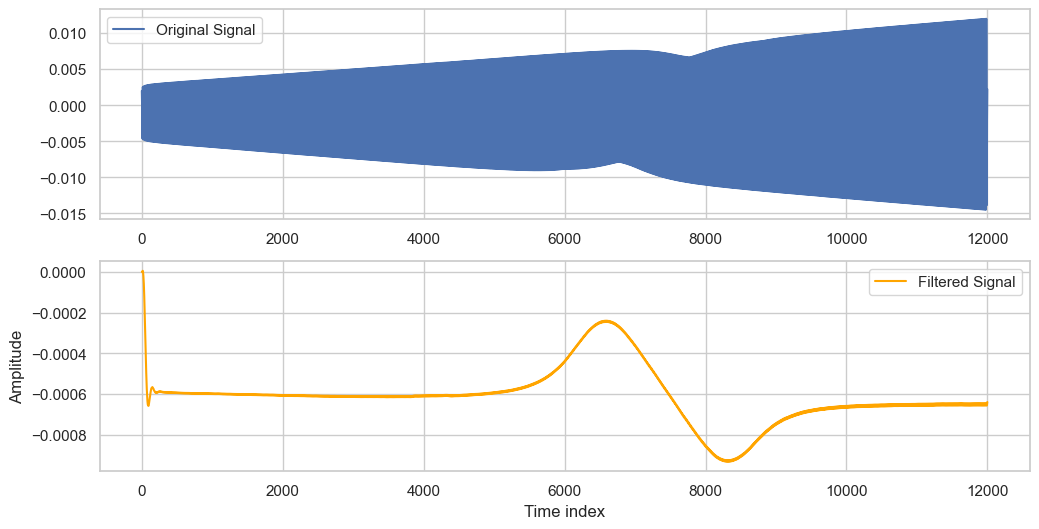

In [66]:
# Apply the filter to the signal
filtered_signal_cos = lfilter(b, a, in_phase_cos)

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(in_phase_cos, label='Original Signal')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(filtered_signal_cos, label='Filtered Signal', color='orange')
plt.legend()
plt.xlabel('Time index')
plt.ylabel('Amplitude')
plt.show()

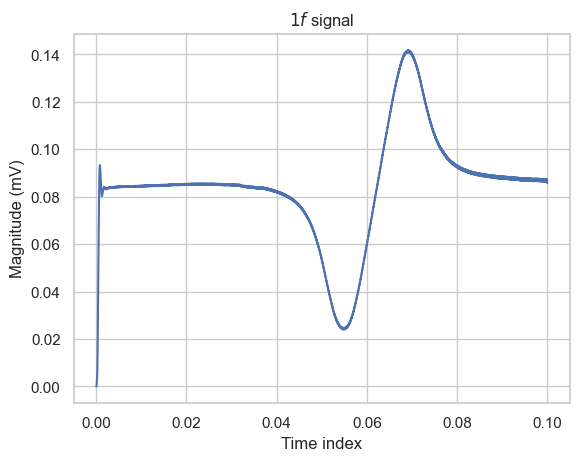

In [68]:
mag = np.sqrt(filtered_signal**2 + filtered_signal_cos**2)
required_magnitude = (2*mag) / mod_amplitude

plt.plot(time, required_magnitude)
plt.title('$1f$ signal')
plt.xlabel('Time index')
plt.ylabel('Magnitude (mV)')
plt.show()